# Optimisation Algorithms

- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [9]:
# Get or create a dataset
X, y = make_regression(n_samples = 10000, n_features = 20, n_informative = 20, noise = 10, random_state = 1)

# Normalisation
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X - u) / std

In [10]:
# Add a column of 1s for vectorisation
ones = np.ones((X.shape[0],1))
X = np.hstack((ones, X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [66]:
df = pd.DataFrame(X)
# print(df.head())
# print(df.describe())

### Gradient Descent

In [19]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    e = np.sum((y_ - y) ** 2)
    return e / m

def gradient(X, y, theta):
    m, n = X.shape
    grad = np.zeros((n,))
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, y_ - y)
    return grad / m

def gradient_descent(X, y, lr = 0.01, max_epochs = 300):
    m, n = X.shape
    theta = np.zeros((n,))
    errors = []
    theta_list = []
    
    for i in range(max_epochs):
        grad = gradient(X, y, theta)
        
        theta_list.append(theta)
        theta = theta - lr * grad
        e = error(X, y, theta)
        errors.append(e)
        
    return theta, errors, theta_list

Final error: 260.85991760389396


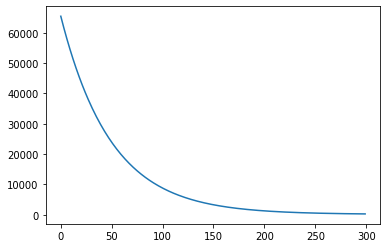

In [37]:
#  Gradient descent - 300 epochs, 0.01 lr

theta, errors, theta_list = gradient_descent(X, y)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 123.06115740557775


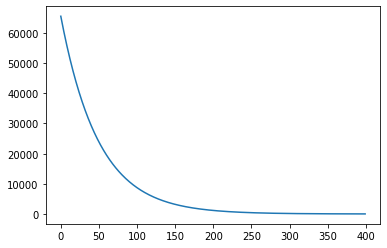

In [38]:
#  Gradient descent - 400 epochs, 0.01 lr

theta, errors, theta_list = gradient_descent(X, y, 0.01, 400)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 101.51560815464372


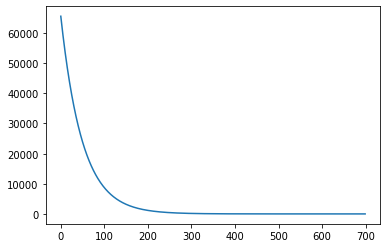

In [39]:
#  Gradient descent - 700 epochs, 0.01 lr

theta, errors, theta_list = gradient_descent(X, y, 0.01, 700)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 101.45986708085383


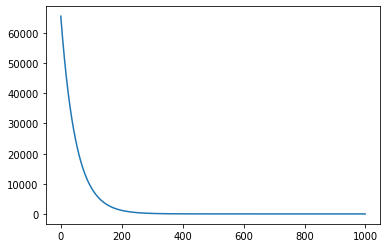

In [40]:
#  Gradient descent - 1000 epochs, 0.01 lr

theta, errors, theta_list = gradient_descent(X, y, 0.01, 1000)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 101.4597143861773


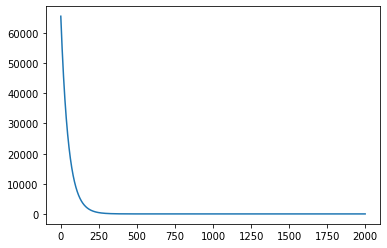

In [41]:
#  Gradient descent - 2000 epochs, 0.01 lr

theta, errors, theta_list = gradient_descent(X, y, 0.01, 2000)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

---

### Mini-Batch Gradient Descent

In [23]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    e = np.sum((y_ - y) ** 2)
    return e / m

def gradient(X, y, theta):
    m, n = X.shape
    grad = np.zeros((n,))
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, y_ - y)
    return grad / m

def mini_batch_gradient_descent(X, y, lr = 0.01, batch_size = 200, max_epochs = 10):
    m, n = X.shape
    theta = np.zeros((n,))
    errors = []
    
    data = np.hstack((X, y.reshape((-1, 1))))
    
    for epoch in range(max_epochs):
        
        np.random.shuffle(data)
        total_batches = m // batch_size
        
        for i in range(total_batches):
            batch_data = data[i * batch_size: (i + 1) * batch_size,:]
            
            x_batch = batch_data[:, :-1]
            y_batch = batch_data[:, -1]
            
            batch_grad = gradient(x_batch, y_batch, theta)
            
            theta = theta - lr * batch_grad
            e = error(x_batch, y_batch, theta)
            errors.append(e)
        
    return theta, errors

Final error: 99.67029089730894


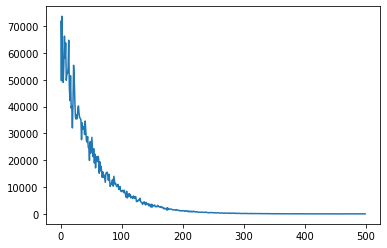

In [30]:
#  Mini-batch gradient descent - 10 epochs, 200 batch_size, 0.01 lr

theta, errors = mini_batch_gradient_descent(X, y)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 99.63968378476075


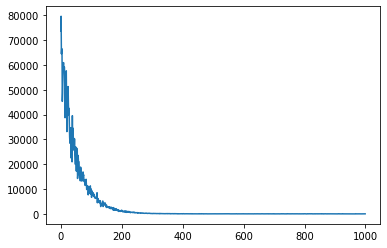

In [31]:
#  Mini-batch gradient descent - 10 epochs, 100 batch_size, 0.01 lr

theta, errors = mini_batch_gradient_descent(X, y, 0.01, 100, 10)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 111.58195463758446


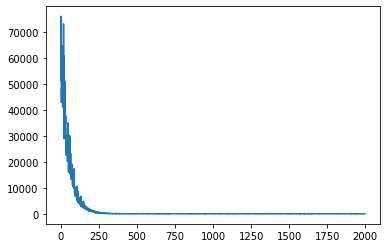

In [32]:
#  Mini-batch gradient descent - 10 epochs, 50 batch_size, 0.01 lr

theta, errors = mini_batch_gradient_descent(X, y, 0.01, 50, 10)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 69.70971886131706


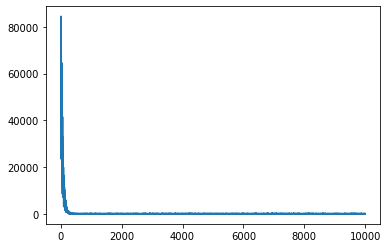

In [33]:
#  Mini-batch gradient descent - 10 epochs, 10 batch_size, 0.01 lr

theta, errors = mini_batch_gradient_descent(X, y, 0.01, 10, 10)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 13.546797448998614


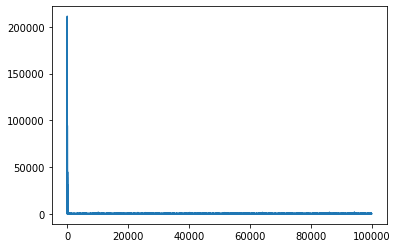

In [42]:
#  Mini-batch gradient descent - 10 epochs, 1 batch_size, 0.01 lr
# STOCHASTIC GRADIENT DESCENT

theta, errors = mini_batch_gradient_descent(X, y, 0.01, 1, 10)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 101.12298132542615


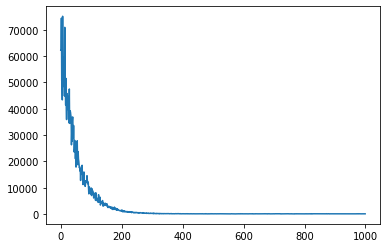

In [45]:
#  Mini-batch gradient descent - 10 epochs, 100 batch_size, 0.01 lr

theta, errors = mini_batch_gradient_descent(X, y, 0.01, 100, 10)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 88.8148416738739


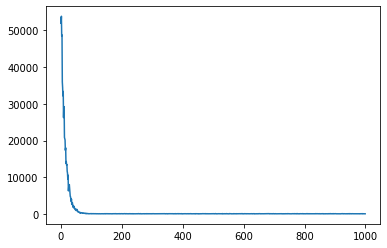

In [46]:
#  Mini-batch gradient descent - 10 epochs, 100 batch_size, 0.04 lr

theta, errors = mini_batch_gradient_descent(X, y, 0.04, 100, 10)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

Final error: 80.80221920885126


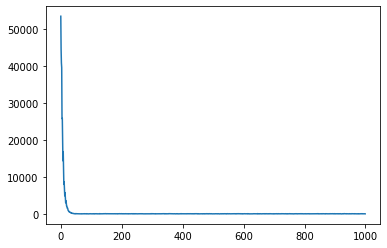

In [47]:
#  Mini-batch gradient descent - 10 epochs, 100 batch_size, 0.08 lr

theta, errors = mini_batch_gradient_descent(X, y, 0.08, 100, 10)

print("Final error:", errors[-1])
plt.figure()
plt.plot(np.arange(len(errors)), errors)
plt.show()

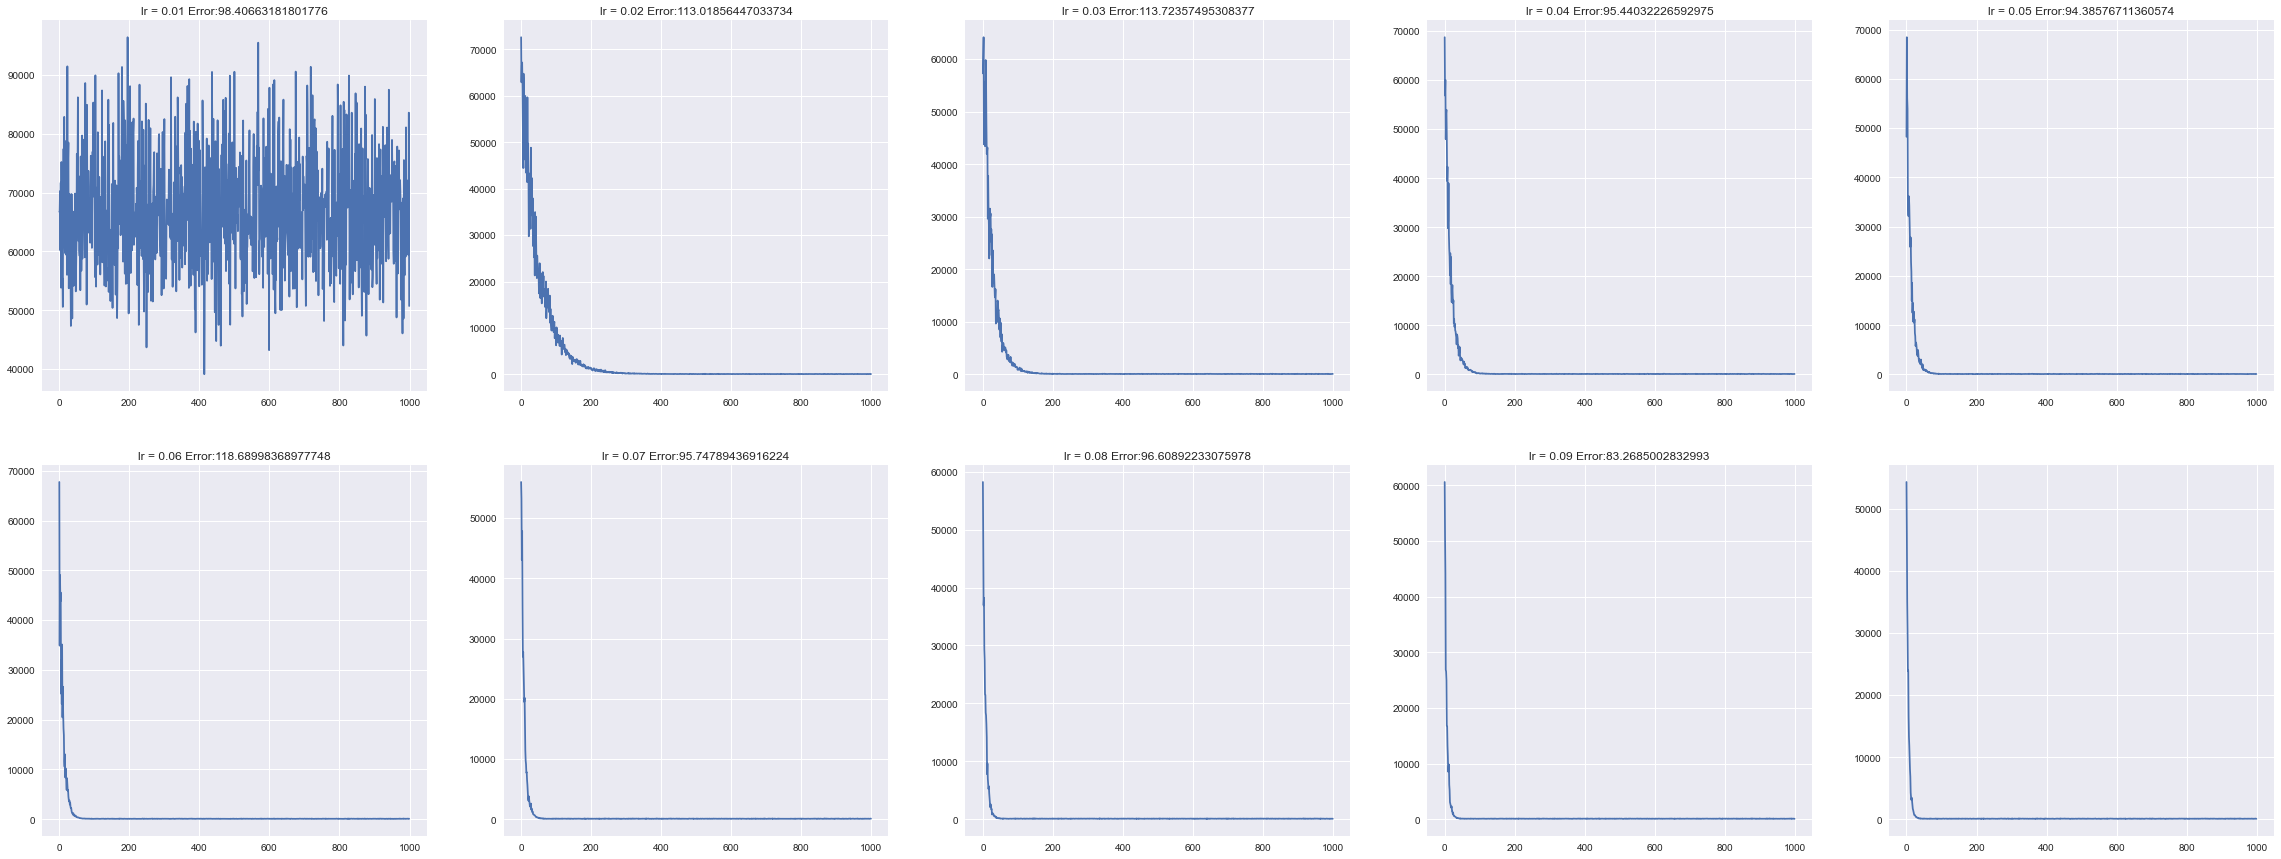

In [61]:
i = 1
plt.figure(figsize=(40, 15))

for j in range(0, 10, 1):
    
    # ALGORITHM
    lr = j / 100
    
    theta, errors = mini_batch_gradient_descent(X, y, lr, 100, 10)

    plt.style.use('seaborn')
    plt.title('lr = ' + str(lr) + " Error:" + str(errors[-1]))
    plt.subplot(2, 5, j + 1)
    plt.plot(np.arange(len(errors)), errors)

    i += 1
plt.show()

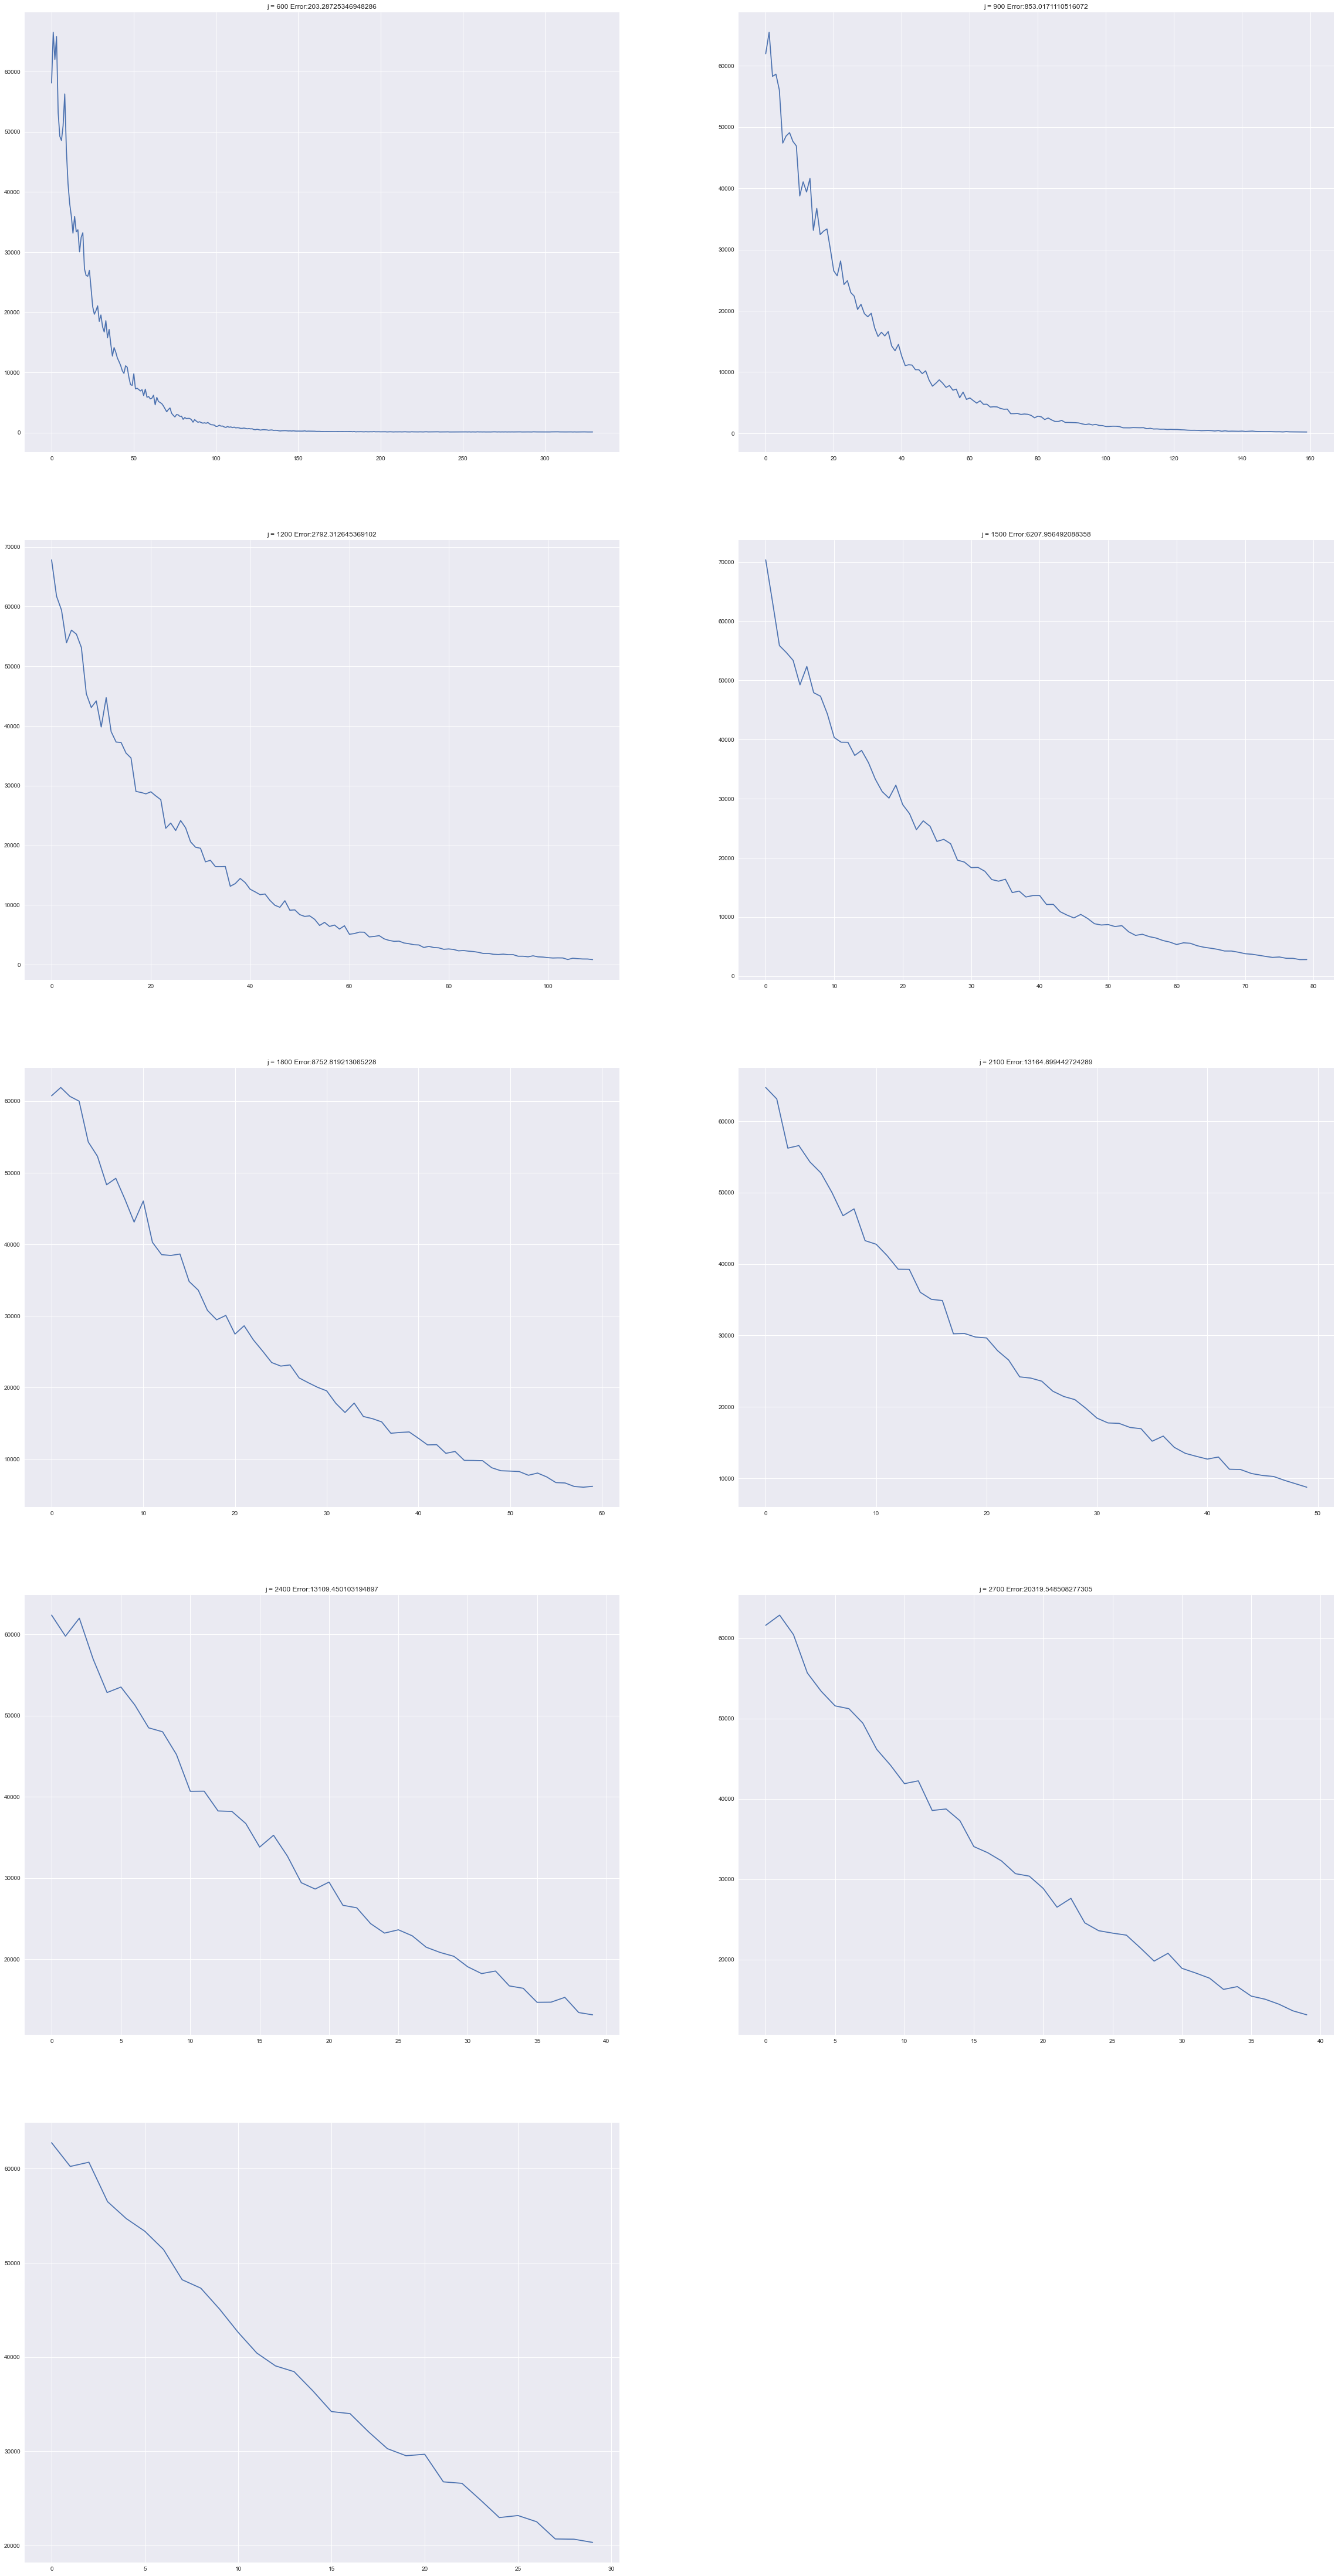

In [65]:
i = 1
plt.figure(figsize=(40, 80))

for j in range(300, 3000, 300):
    
    theta, errors = mini_batch_gradient_descent(X, y, 0.02, j, 10)

    plt.style.use('seaborn')
    plt.title('j = ' + str(j) + " Error:" + str(errors[-1]))
    plt.subplot(5, 2, int(j/300))
    plt.plot(np.arange(len(errors)), errors)

    i += 1
plt.show()